In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import scipy.stats as stats

In [2]:
# завантажуємо дані
dataset=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv',index_col=[0])

In [3]:
# Описова характеристика
dataset.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:
dataset.shape

(3694, 13)

In [5]:
dataset.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [6]:
dataset.info

<bound method DataFrame.info of        item_id                   name       category   price     old_price  \
0     90420332               FREKVENS  Bar furniture   265.0  No old price   
1       368814              NORDVIKEN  Bar furniture   995.0  No old price   
2      9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
3     80155205                   STIG  Bar furniture    69.0  No old price   
4     30180504                NORBERG  Bar furniture   225.0  No old price   
...        ...                    ...            ...     ...           ...   
3689  99157902                ELVARLI      Wardrobes   750.0        SR 820   
3690   9158152                ELVARLI      Wardrobes  1572.0      SR 1,755   
3691  59157541                ELVARLI      Wardrobes   924.0      SR 1,050   
3692  89157573                ELVARLI      Wardrobes  2745.0      SR 3,130   
3693  69157376                ELVARLI      Wardrobes  1231.0      SR 1,535   

      sellable_online          

In [7]:
print(dataset.isnull().sum())

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64


In [8]:
dataset.describe(include='all')

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
count,3.694000e+03,3694,3694,3694.000000,3694,3694,3694,3694,3694,3694,2231.000000,2706.000000,3105.000000
unique,NaN,607,17,NaN,365,2,2962,2,1706,381,NaN,NaN,NaN
top,NaN,BESTÅ,Tables & desks,NaN,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden,NaN,NaN,NaN
freq,NaN,173,612,NaN,3040,3666,4,2182,59,828,NaN,NaN,NaN
mean,4.863240e+07,NaN,NaN,1078.208419,NaN,NaN,NaN,NaN,NaN,NaN,54.379202,101.679970,104.470853
std,2.888709e+07,NaN,NaN,1374.652494,NaN,NaN,NaN,NaN,NaN,NaN,29.958351,61.097585,71.133771
min,5.848700e+04,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,2.039057e+07,NaN,NaN,180.900000,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,67.000000,60.000000
50%,4.928808e+07,NaN,NaN,544.700000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,83.000000,80.000000
75%,7.040357e+07,NaN,NaN,1429.500000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,124.000000,140.000000


In [9]:
dataset.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [10]:
len(dataset.category.unique())

17

In [11]:
dataset.sellable_online.unique() 

array([ True, False])

In [12]:
print(dataset[dataset.category == 'Tables & desks' ].price.mean())
print(dataset[dataset.category == 'Tables & desks' ].price.min())
print(dataset[dataset.category == 'Tables & desks' ].price.max())

1129.3954248366013
9.0
6965.0


In [13]:
dataset[dataset.item_id == 79241940] #Присутні різні товари з однаковим item_id

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
41,79241940,NORRÅKER / NORRÅKER,Bar furniture,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
1100,79241940,NORRÅKER / NORRÅKER,Café furniture,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
1469,79241940,NORRÅKER / NORRÅKER,Chairs,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
3164,79241940,NORRÅKER / NORRÅKER,Tables & desks,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0


In [15]:
dataset.category[dataset.category == 'Tables & desks'].value_counts()['Tables & desks'] 
list_category =[item for item in dataset.category.value_counts()]

dataset_category=pd.DataFrame(list_category,index=dataset.category.unique() )
dataset_category.shape
dataset_category #DataFrame який показує кількість позицій в кожній категорії


,0
Bar furniture,612
Beds,548
Bookcases & shelving units,481
Cabinets & cupboards,428
Café furniture,292
Chairs,236
Chests of drawers & drawer units,216
Children's furniture,208
Nursery furniture,190
Outdoor furniture,125


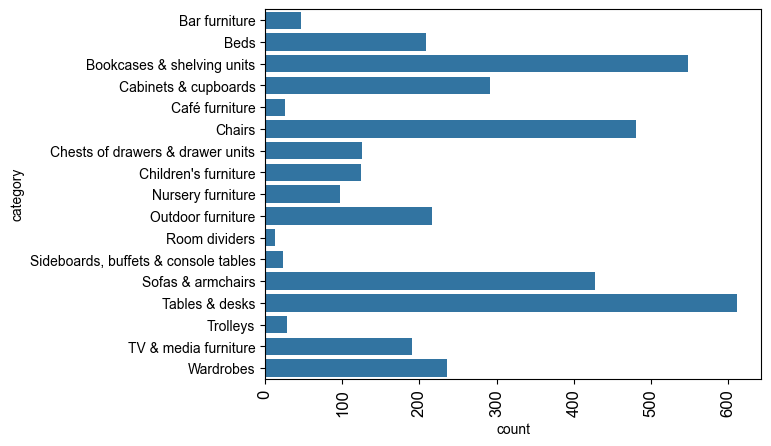

In [16]:
# блок візуалізації
sns.countplot(dataset.category)
plt.xticks(fontsize='large', rotation=90)
sns.set(rc={'figure.figsize':(14,10)})

In [17]:
dataset_agg_func = dataset.groupby('category').agg(max_price=('price','max'), min_price=('price','min'), mean_price=('price','mean'))
dataset_agg_func

,max_price,min_price,mean_price
category,,,
Bar furniture,2375.0,40.0,679.553191
Beds,9585.0,30.0,1647.432692
Bookcases & shelving units,4335.0,3.0,519.416058
Cabinets & cupboards,6480.0,3.0,789.015753
Café furniture,1385.0,145.0,553.884615
Chairs,6965.0,11.4,1048.932640
Chests of drawers & drawer units,1880.0,49.0,612.180000
Children's furniture,1545.0,5.0,272.758065
Nursery furniture,1545.0,5.0,393.659794


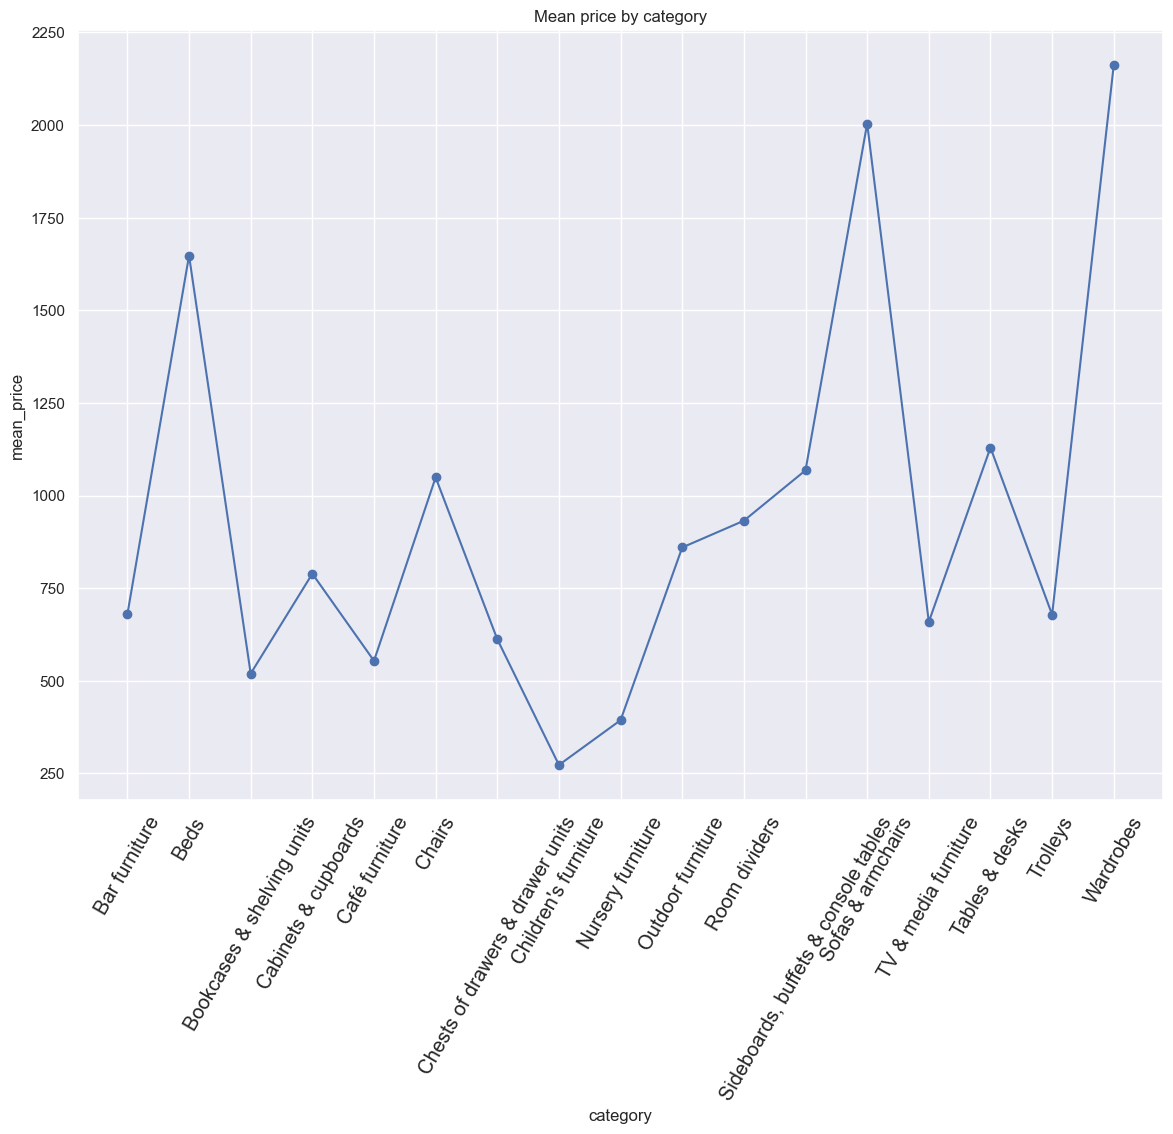

In [18]:
fig, ax = plt.subplots()
plt.xticks(fontsize='large', rotation=60)
plt.ylabel('mean_price')
plt.xlabel('category')
plt.title('Mean price by category')
plt.plot(dataset_agg_func.index, dataset_agg_func.mean_price, marker='o')


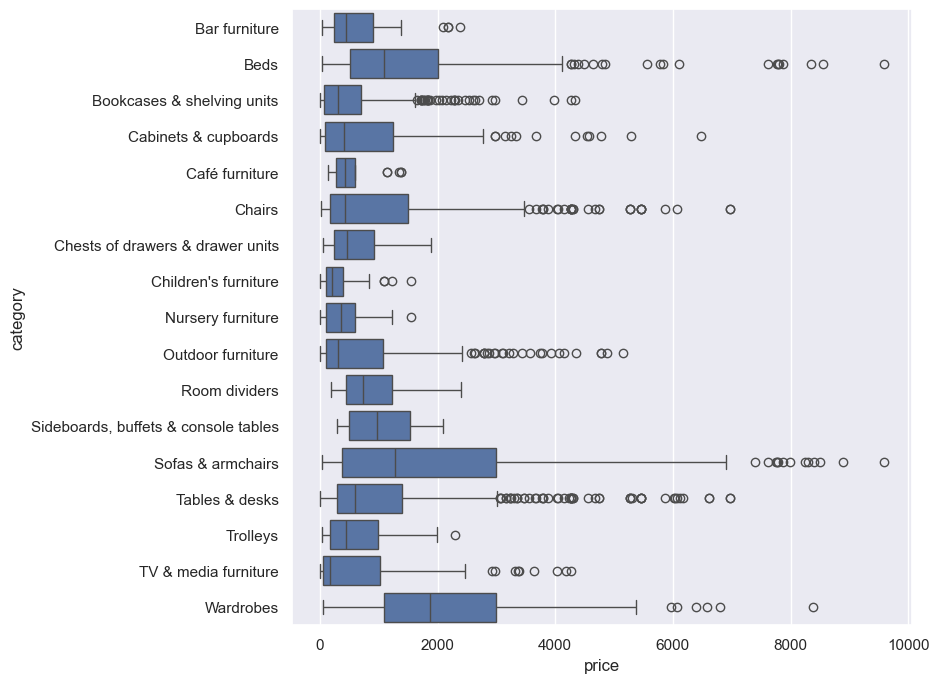

In [19]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=dataset, x='price', y='category')
plt.show() # на даному графіку можем помітити ненормальні значння в ціні, від яких треба позбутись

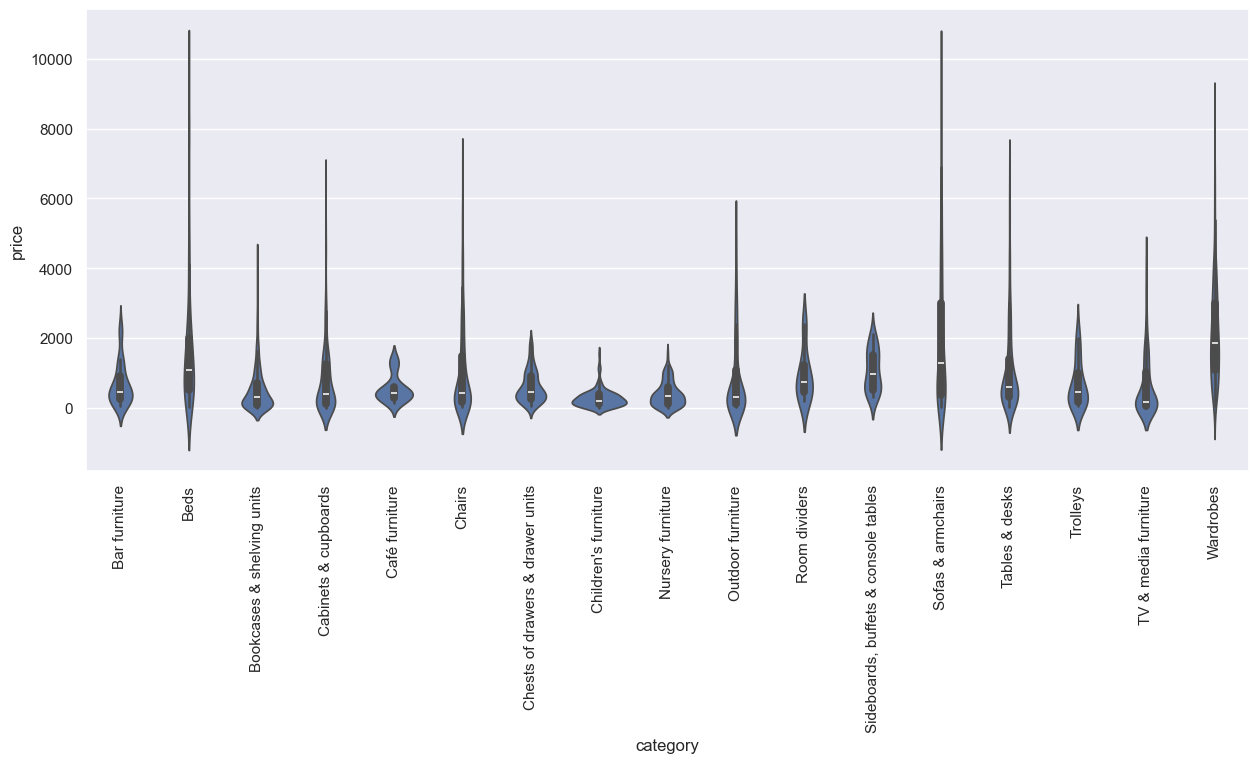

In [20]:
plt.subplots(figsize=(15,6))
sns.violinplot(data=dataset, y='price', x='category')
plt.xticks(rotation=90)
plt.show()  # на даному графіку також бачим анормальні значення по ціні

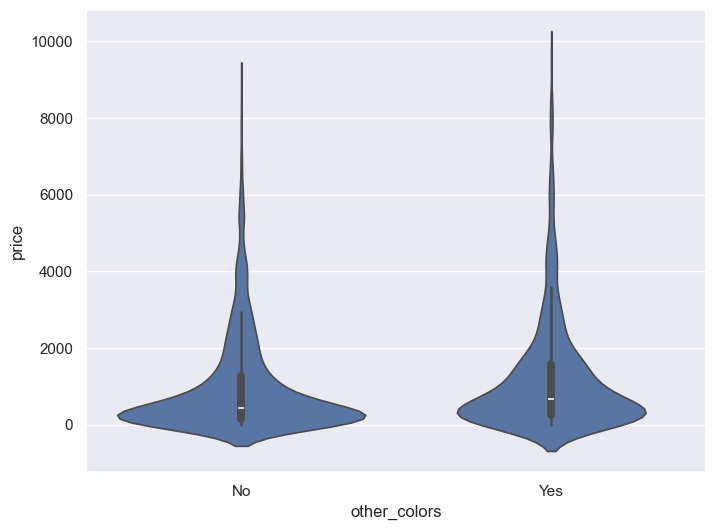

In [21]:
plt.subplots(figsize=(8,6))
sns.violinplot(data=dataset, y='price', x='other_colors')
plt.show()

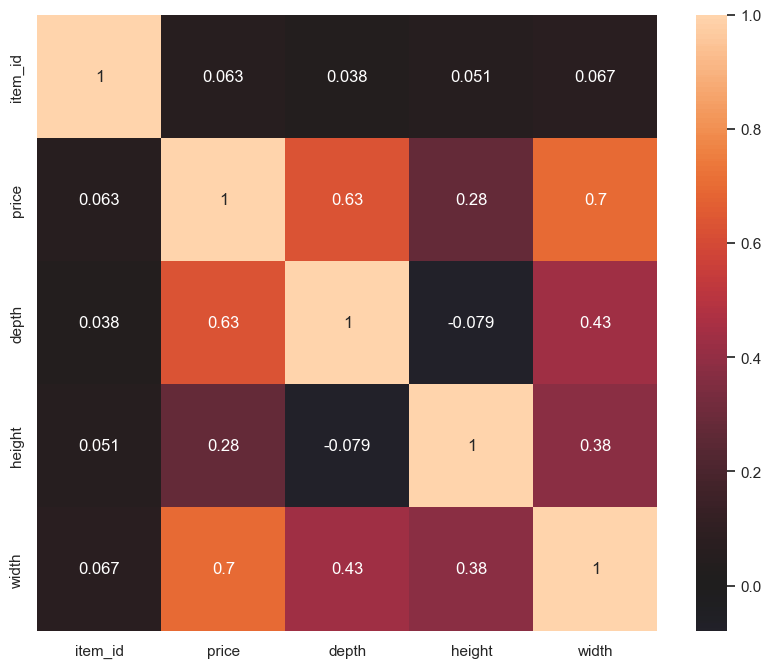

In [24]:
# побудуємо матрицю кориляції для визначення впливу параметрів depth weight height на ціну price
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataset[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, center=0, annot=True)
plt.show()

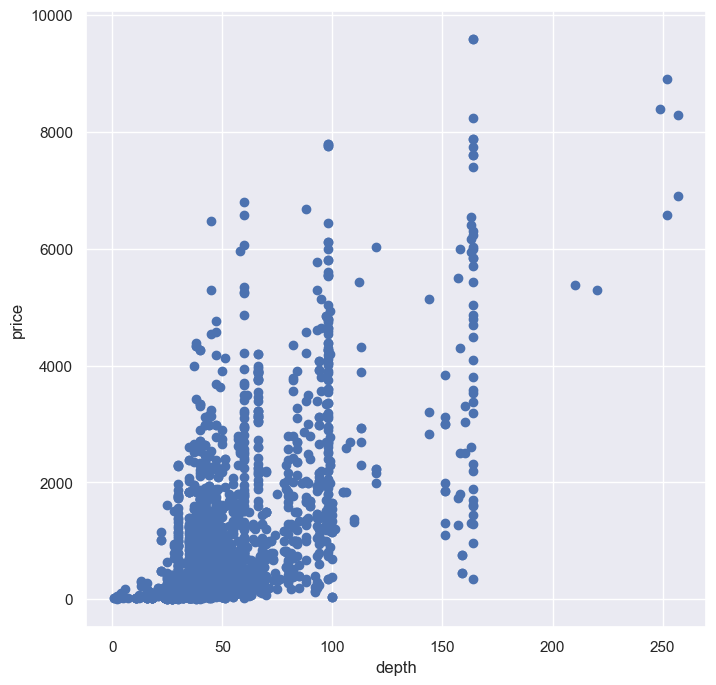

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(dataset['depth'], dataset['price'])
ax.set_xlabel('depth')
ax.set_ylabel('price')
plt.show()

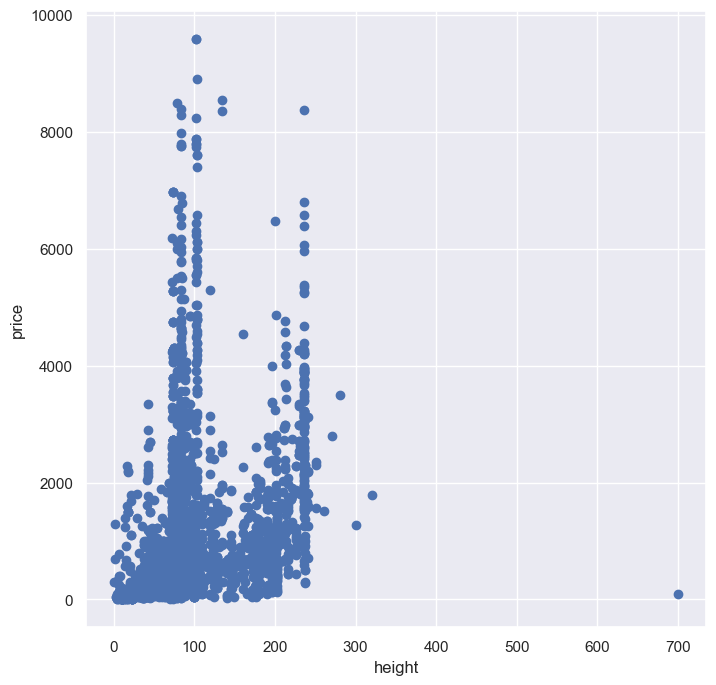

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(dataset['height'], dataset['price'])
ax.set_xlabel('height')
ax.set_ylabel('price')
plt.show()

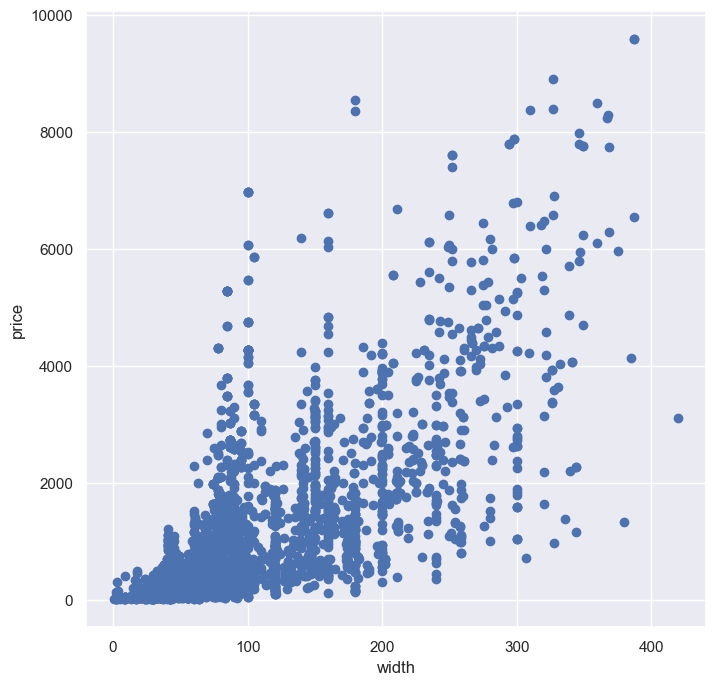

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(dataset['width'], dataset['price'])
ax.set_xlabel('width')
ax.set_ylabel('price')
plt.show()

In [29]:
dataset[dataset.category == 'Tables & desks']

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2628,19011777,MELLTORP,Tables & desks,199.0,SR 250,True,https://www.ikea.com/sa/en/p/melltorp-table-wh...,No,"Table, 125x75 cm",Lisa Norinder,NaN,74.0,75.0
2629,70466496,LJUV,Tables & desks,245.0,No old price,True,https://www.ikea.com/sa/en/p/ljuv-coffee-table...,No,"Coffee table, 60x52 cm",Nada Debs,NaN,28.0,52.0
2630,60214159,MALM,Tables & desks,475.0,SR 545,True,https://www.ikea.com/sa/en/p/malm-desk-white-6...,Yes,"Desk, 140x65 cm",602.141.59 You can collect cables and extensio...,65.0,73.0,140.0
2631,49011766,MELLTORP / ADDE,Tables & desks,179.0,SR 205,True,https://www.ikea.com/sa/en/p/melltorp-adde-tab...,No,"Table and 2 chairs, 75 cm",Lisa Norinder/Marcus Arvonen,NaN,72.0,75.0
2632,59133593,LINNMON / ADILS,Tables & desks,270.0,SR 315,True,https://www.ikea.com/sa/en/p/linnmon-adils-cor...,Yes,"Corner table, 120x120 cm",Jon Karlsson,NaN,74.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,90247139,BACKARYD,Tables & desks,195.0,No old price,True,https://www.ikea.com/sa/en/p/backaryd-underfra...,No,Underframe,David Wahl,NaN,71.0,74.0
3236,99246098,MÖRBYLÅNGA / ODGER,Tables & desks,3475.0,No old price,True,https://www.ikea.com/sa/en/p/moerbylanga-odger...,No,"Table and 4 chairs, 140x85 cm",J Löfgren/J Pettersson/S Lanneskog/J Marnell,NaN,74.0,85.0
3237,99304781,LANEBERG / KARLJAN,Tables & desks,1195.0,No old price,True,https://www.ikea.com/sa/en/p/laneberg-karljan-...,No,"Table and 4 chairs, 130/190x8...",K Hagberg/M Hagberg/Francis Cayouette,NaN,NaN,80.0
3238,99304795,LANEBERG / SVENBERTIL,Tables & desks,1475.0,No old price,True,https://www.ikea.com/sa/en/p/laneberg-svenbert...,No,"Table and 4 chairs, 130/190x8...",K Hagberg/M Hagberg/Mia Lagerman,NaN,NaN,80.0


In [30]:
#  використаємо перший варіант чистки даних: dropna()
dataset_droped = dataset.dropna()
print(dataset_droped.isna().any())
print('-----------------------------')
print(dataset_droped.count())

item_id              False
name                 False
category             False
price                False
old_price            False
sellable_online      False
link                 False
other_colors         False
short_description    False
designer             False
depth                False
height               False
width                False
dtype: bool
-----------------------------
item_id              1899
name                 1899
category             1899
price                1899
old_price            1899
sellable_online      1899
link                 1899
other_colors         1899
short_description    1899
designer             1899
depth                1899
height               1899
width                1899
dtype: int64


In [31]:
# Чистим датасет від екстремальних значень ціни
Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)
IQR = Q3-Q1

In [33]:
fence_coef = 3
dataset_clean = dataset_droped[~((dataset_droped.price.astype(float) < (Q1 - fence_coef * IQR)) | (dataset_droped.price.astype(float) > (Q3 + fence_coef * IQR)))]
dataset_clean.count()

item_id              1843
name                 1843
category             1843
price                1843
old_price            1843
sellable_online      1843
link                 1843
other_colors         1843
short_description    1843
designer             1843
depth                1843
height               1843
width                1843
dtype: int64

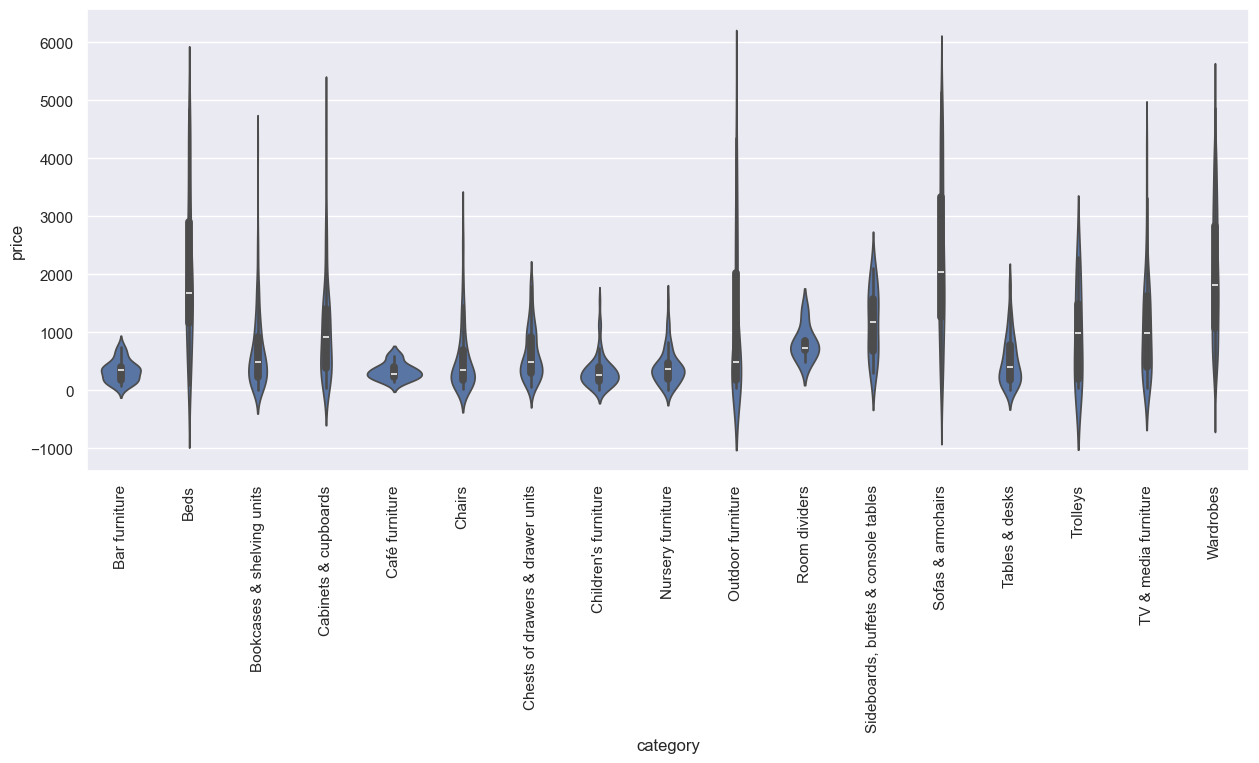

In [34]:
plt.subplots(figsize=(15,6))
sns.violinplot(data=dataset_clean, y='price', x='category')
plt.xticks(rotation=90)
plt.show() 

(array([  4.,  13.,  28.,  72., 165., 276., 391., 363., 344., 187.]),
 array([0.77815125, 1.07147466, 1.36479808, 1.65812149, 1.9514449 ,
        2.24476831, 2.53809173, 2.83141514, 3.12473855, 3.41806197,
        3.71138538]),
 <BarContainer object of 10 artists>)

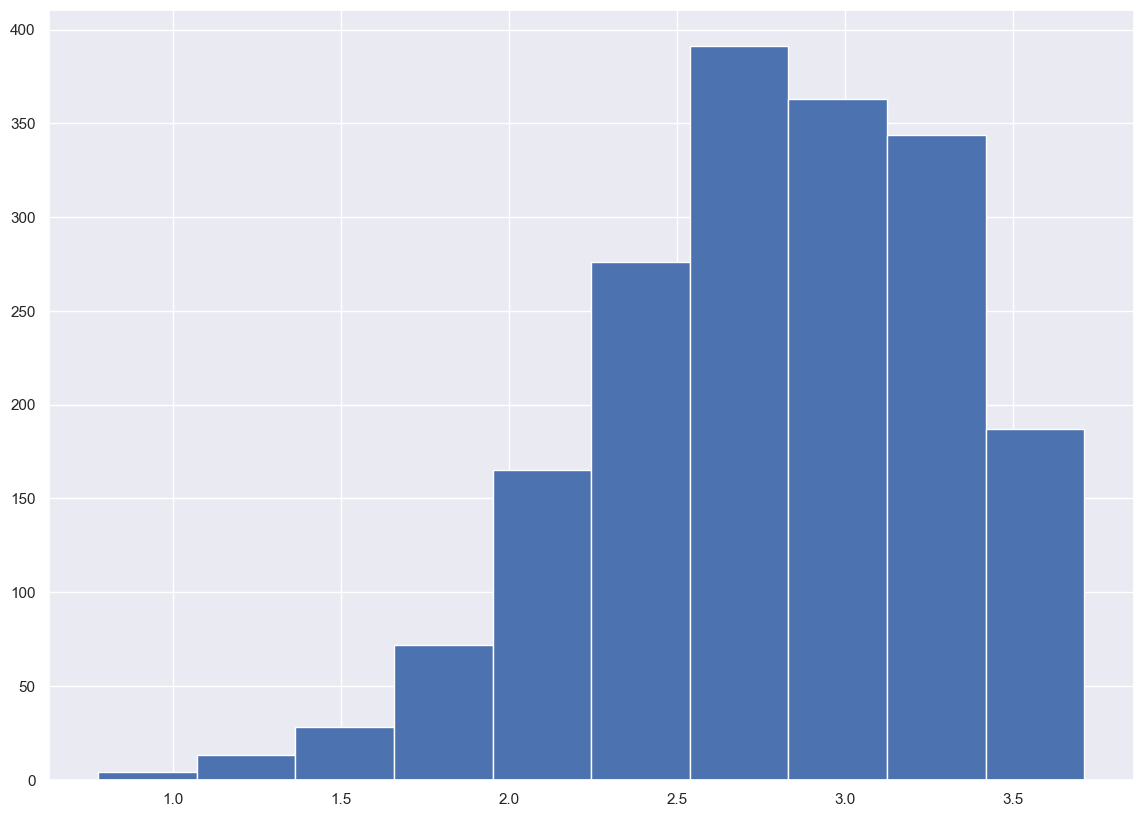

In [35]:
# Перевірка гіпотези 1 про нормальнисть даних
plt.hist(np.log10(dataset_clean.price))

In [44]:
# для перевірки використовуємо метод шапіро
h0_1_p_value = stats.shapiro(np.log10(dataset_clean.price)).pvalue
h0_1_p_value 

3.8692846195402704e-16

(array([  1.,   0.,   0.,   3.,   0.,   0.,  10.,   0.,   3.,   0.,   2.,
          3.,   0.,  11.,  12.,  12.,  16.,   5.,  17.,  22.,  34.,  15.,
         25.,  42.,  49.,  54.,  39.,  47.,  66.,  70., 107.,  75.,  68.,
         49.,  92.,  65.,  52., 101.,  66.,  79.,  84.,  82.,  78.,  47.,
         53.,  50.,  40.,  39.,  32.,  26.]),
 array([0.77815125, 0.83681593, 0.89548062, 0.9541453 , 1.01280998,
        1.07147466, 1.13013935, 1.18880403, 1.24746871, 1.30613339,
        1.36479808, 1.42346276, 1.48212744, 1.54079212, 1.59945681,
        1.65812149, 1.71678617, 1.77545085, 1.83411554, 1.89278022,
        1.9514449 , 2.01010958, 2.06877427, 2.12743895, 2.18610363,
        2.24476831, 2.303433  , 2.36209768, 2.42076236, 2.47942705,
        2.53809173, 2.59675641, 2.65542109, 2.71408578, 2.77275046,
        2.83141514, 2.89007982, 2.94874451, 3.00740919, 3.06607387,
        3.12473855, 3.18340324, 3.24206792, 3.3007326 , 3.35939728,
        3.41806197, 3.47672665, 3.53539133, 3.

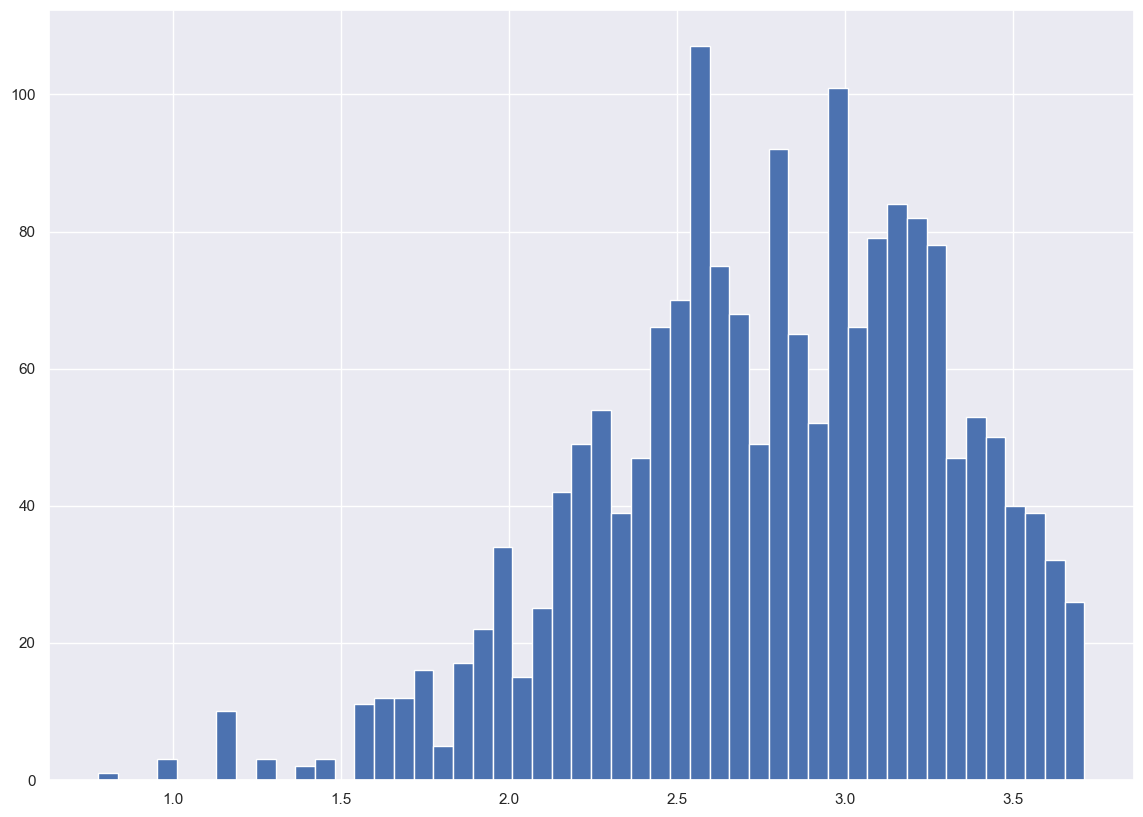

In [37]:
plt.hist(np.log10(dataset_clean.price), bins=50)
# критерія шапіро використовується для перевірки нормальноcті даних

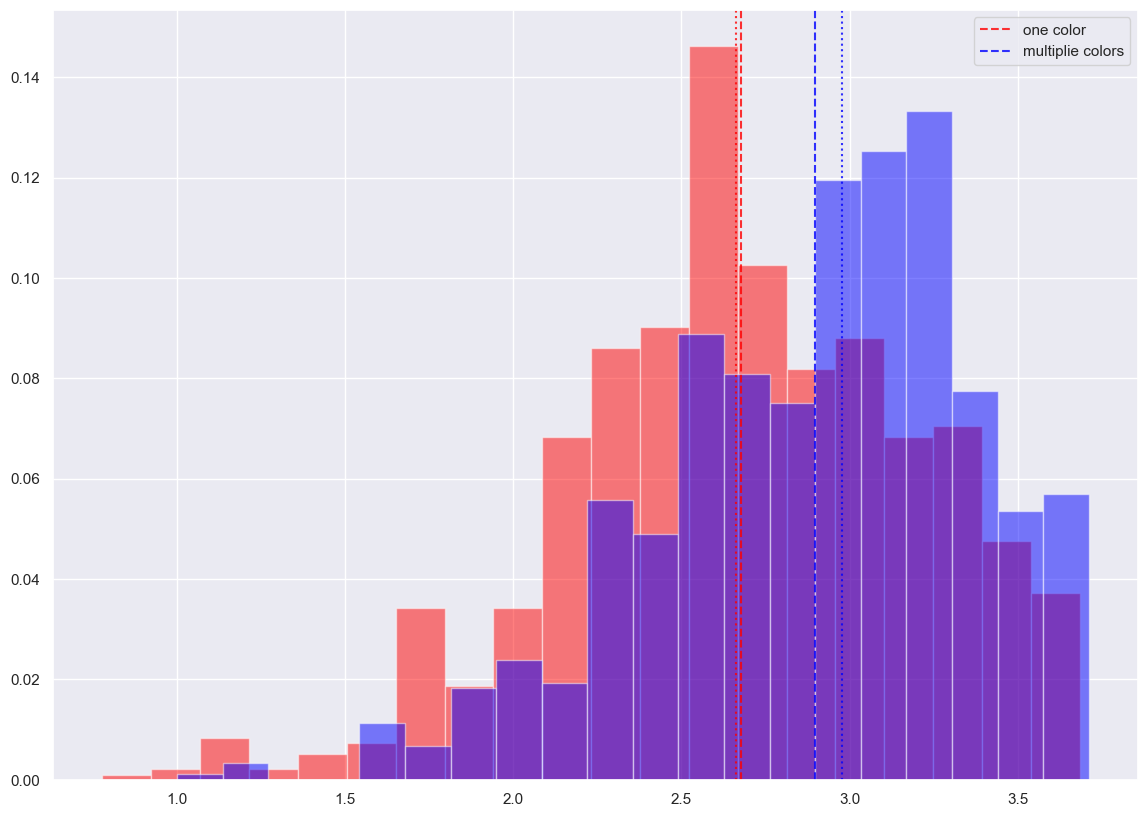

In [38]:
# Гіпотеза 2: чи впливає колір на ціну товару
one_color = dataset_clean[dataset_clean['other_colors'] == 'No']['price'].apply(np.log10)
mult_color = dataset_clean[dataset_clean['other_colors'] == 'Yes']['price'].apply(np.log10)
one_color.name, mult_color.name = 'one color', 'multiplie colors'
 
one_color.hist(alpha=0.5, color='red', weights=[1./len(one_color)]*len(one_color), bins=20)
mult_color.hist(alpha=0.5, color='blue', weights=[1./len(mult_color)]*len(mult_color), bins=20)
plt.axvline(one_color.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(mult_color.mean(), color='blue', alpha=0.8, linestyle='dashed')
plt.axvline(one_color.median(), color='red', alpha=0.8, linestyle='dotted')
plt.axvline(mult_color.median(), color='blue', alpha=0.8, linestyle='dotted')
plt.legend([one_color.name, mult_color.name])


In [40]:
sps.mannwhitneyu(one_color, mult_color).pvalue

2.0857281898164384e-21

In [42]:
stats.ttest_ind(one_color, mult_color, equal_var=False).pvalue

7.47409803898066e-21

In [ ]:
# Гіпотеза не правильна, так як p-value дуже маленьке

In [45]:
# дропнули непотрібні колонки
dataset_cleaned = dataset_clean.drop(['link','item_id'], axis=1)
dataset_cleaned

,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
3683,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,No old price,True,Yes,"Wardrobe combination, 75x60x2...",Ehlén Johansson/IKEA of Sweden,60.0,201.0,75.0
3684,ELVARLI,Wardrobes,1245.0,"SR 1,735",True,No,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.0,216.0,164.0
3685,PAX / FORSAND,Wardrobes,2100.0,No old price,True,Yes,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.0,236.0,100.0
3686,PAX / HOKKSUND,Wardrobes,3985.0,No old price,True,No,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0


In [46]:
dataset_cleaned.columns

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [47]:
# Почистим колонку дизайнерів

def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    # якщо це не строчка повертаємо саме значення
    if not isinstance(value, str):
        return value
    #якщо строчка починається на цифру, повертаємо пусте значення
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    # розбиваємо строчку по / 
    designers = value.split("/")
    if removeIKEA:
        #намагаємось видалити "IKEA of Sweden"
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        #повертаємо строку відсортовану по імені дизайнерів
        return '/'.join(sorted(designers))
    else:
        #або пусту строчку, якщо список пустий
        return emptyValue

In [48]:
dataset_cleaned['designer_clean'] = dataset_cleaned['designer'].apply(cleanDesigners, args=(False,"IKEA of Sweden"))

In [49]:
dataset_cleaned['designer_clean'].value_counts()

designer_clean
IKEA of Sweden                                      484
Ehlén Johansson/IKEA of Sweden                      122
Ola Wihlborg                                         93
Jon Karlsson                                         89
K Hagberg/M Hagberg                                  70
                                                   ... 
Olle Lundberg                                         1
Eva Schildt                                           1
Eva Lilja Löwenhielm/Francis Cayouette                1
C Styrbjörn/M Axelsson                                1
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong      1
Name: count, Length: 103, dtype: int64

In [50]:
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [52]:
# Починаєм тренувати модель на передбачення ціни
X = dataset_cleaned[['depth','width','height','category','designer_clean','other_colors']]

Y = dataset_cleaned['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      depth  width  height                          category  \
952    47.0   81.0   212.0              Cabinets & cupboards   
1665   51.0   50.0    70.0  Chests of drawers & drawer units   
3365   40.0  180.0    64.0              TV & media furniture   
3277   36.0  150.0    54.0              TV & media furniture   
2348   98.0  190.0    83.0                 Sofas & armchairs   
...     ...    ...     ...                               ...   
1919   44.0   94.0    91.0                 Nursery furniture   
2253   88.0  153.0    85.0                 Sofas & armchairs   
1485   50.0   53.0    84.0                            Chairs   
2677   25.0   29.0    88.0                    Tables & desks   
1913   61.0   56.0    87.0                 Nursery furniture   

                       designer_clean other_colors  
952                    IKEA of Sweden          Yes  
1665                   IKEA of Sweden           No  
3365                   IKEA of Sweden          Yes  
3277               

In [53]:
numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])
 
categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
 
col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth','width','height']),
    ('categorical', categorical_transf, ['category','designer_clean','other_colors'])
])
 
dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])
 
dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.77890
MAE : 307.59761
MSE : 494.21416


In [55]:
# використаємо альтернативний спосіб видалення пропущених значень
dataset

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


In [56]:
dataset['designer_clean'] = dataset['designer'].apply(cleanDesigners, args=(False,"IKEA of Sweden"))
dataset["other_colors_1"] = dataset["other_colors"].map(dict(Yes=1, No=0))
 
# розраховуєм середнє значення кожного габарита в розрізі категорій
median_d = dataset.groupby(['category'])['depth'].median()
median_h = dataset.groupby(['category'])['height'].median()
median_w = dataset.groupby(['category'])['width'].median()
 
median_price = dataset.groupby(['category'])['price'].median()
median_dsgn = dataset.groupby(['designer_clean'])['price'].median()
 
dataset = dataset.set_index(['category'])
dataset['depth_1'] = dataset['depth'].fillna(median_d)
dataset['height_1'] = dataset['height'].fillna(median_h)
dataset['width_1'] = dataset['width'].fillna(median_w)
dataset['category_median_price'] = median_price
dataset = dataset.reset_index()
 
dataset = dataset.set_index(['designer_clean'])
dataset['designer_median_price'] = median_dsgn
dataset = dataset.reset_index()
 
dataset.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [68]:
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
 
    TestModels = pd.DataFrame(columns=['Model', 'R^2', 'MAE', 'RMSE'])
    res = {}
    tmp = {}
    # для кожної моделі з списку
    for model in models:
        # отримуєм ім'я моделі
        m = str(model)
        tmp['Model'] = m[:m.index('(')]    
        # навчаємо модель
        model.fit(X_train, Y_train) 
        # вираховуємо R^2 - коефіцієнт детармінації
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        # вираховуємо MAE - середній модуль відхилення
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        # вираховуємо RMSE - корінь від середнього квадрату відхилення
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
 
        #записуєм дані і підсумковий DataFrame
        TestModels.loc[tmp['Model']] = tmp
    # робимо індекс по назві моделі
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [69]:
'''TEST 1: Візьмемо габарити розраховані за медіаною в розрізі категорій, категорії та дизайнери закодовані медіаною ціною.
Перевіримо, який регресор покаже найкращий результат і як зміниться оцінка для моделі на основі дерева рішень.'''

X1 = dataset[['width_1','depth_1','height_1','category_median_price','designer_median_price','other_colors_1']]
Y1 = dataset['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.83172,295.91918,569.52431
GradientBoostingRegressor,0.80952,361.15451,605.93247
DecisionTreeRegressor,0.78065,355.57681,650.23047
KNeighborsRegressor,0.71362,421.49250,742.96598
RidgeCV,0.70158,481.15385,758.41411
LinearRegression,0.70156,481.28499,758.43942
LassoCV,0.70152,473.40099,758.49673
SVR,0.68826,448.43841,775.16172


In [48]:
# найкращий результат R^2 - RandomForestRegressor

In [70]:
# TEST 2: Видалимо всі рядки із незаповненими габаритами, категорії та дизайнери закодовані медіаною ціною.
df2 = dataset.dropna(subset=['width','height','depth'])
X2 = df2[['width','depth','height','category_median_price','designer_median_price','other_colors_1']]
Y2 = df2['price']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88104,326.01461,570.81199
GradientBoostingRegressor,0.86160,364.25461,615.67445
DecisionTreeRegressor,0.83272,374.27473,676.87191
RidgeCV,0.75505,538.95780,819.07734
LinearRegression,0.75501,538.99756,819.14734
LassoCV,0.75392,537.33236,820.96933
SVR,0.70911,535.16390,892.59118
KNeighborsRegressor,0.69949,530.48648,907.22940


In [50]:
''' Оцінки R^2 моделей покращилися. RandomForestRegressor - як і раніше показує найкращий результат.
Варто звернути увагу на те, що хоча оцінка R^2 покращилася, але при цьому середнє абсолютне відхилення
MAE побільшало. Швидше за все, це результат того, що в першому випадку ми заповнили велику кількість порожніх 
значення середнім за категорією. Якщо у першому тесті у нас було 3694 значення, то у другому тесті, після
видалення порожніх габаритів – всього 1899 значень. Тобто. майже 48.5% рядків так чи інакше заповнені 
середнім значенням.'''

Тест №3.
Попробуем удалить "IKEA of Sweden" из списка дизайнеров в случае если список дизайнеров содержит другие фамилии. 

Например, у нас есть

designer                              count
Ehlén Johansson                         161
Ehlén Johansson/IKEA of Sweden          145

после преобразования будем иметь

designer                              count
Ehlén Johansson                         306

In [71]:
'''Спробуємо видалити "IKEA of Sweden" із списку дизайнерів, в випадку якщо список дизайнерів містить інші прізвища.
Наприклад, у нас є
designer                              count
Ehlén Johansson                         161
Ehlén Johansson/IKEA of Sweden          145

після перетворення буде
designer                              count
Ehlén Johansson                         306
'''

dataset["designer_clean_2"] = dataset["designer"].apply(cleanDesigners, args=(True, "IKEA of Sweden"))

median_dsgn2 = dataset.groupby(['designer_clean_2'])['price'].median()

dataset = dataset.set_index(['designer_clean_2'])
dataset['designer_median_price2'] = median_dsgn2
dataset = dataset.reset_index()

dataset["designer_clean_2"].value_counts()

designer_clean_2
IKEA of Sweden                        971
Ehlén Johansson                       306
Jon Karlsson                          170
Ola Wihlborg                          165
Francis Cayouette                     164
                                     ... 
E Thomasson/P Süssmann                  1
Magnus Elebäck                          1
Andreas Fredriksson/Marcus Arvonen      1
Lars Norinder                           1
Lisel Garsveden                         1
Name: count, Length: 157, dtype: int64

In [72]:
df3 = dataset.dropna(subset=['width','depth','height'])
X3 = df3[['width','depth','height','category_median_price','designer_median_price2','other_colors_1']]
Y3 = df3['price']

test3 = getBestRegressor(X3, Y3)
test3['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88129,326.26835,570.19801
GradientBoostingRegressor,0.86179,371.08324,615.26074
DecisionTreeRegressor,0.80632,403.59155,728.33313
KNeighborsRegressor,0.74928,502.17479,828.67375
LassoCV,0.74099,555.87528,842.26185
RidgeCV,0.74099,557.54451,842.25116
LinearRegression,0.74095,557.58138,842.32463
SVR,0.69356,554.12453,916.12583


In [53]:
#результати практично не змінились